In [3]:
import csv
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt 

import landmarks_utils
import dataset_utils
import process_heartrate as utils
from importlib import reload

video_dir = "dataset/videos/"
csv_path = "dataset/dataset.csv"
landmarks_path = "dataset/outputs/landmarks/"
datastreams_path = "dataset/outputs/datastreams/"
frames_path = "dataset/outputs/frames/"

fields, rows = dataset_utils.open_csv(csv_path)
reload(utils)

<module 'process_heartrate' from '/Users/dannydu/Desktop/marvl-heartrate/process_heartrate.py'>

In [48]:
reload(utils)

hr_lists = []
hr_medians = []

for filename in os.listdir(datastreams_path):
    if filename[0] == '.': continue
    index = int(filename)
        
    fps = float(rows[index][fields.vid_fps])
    signal_1d = np.load(datastreams_path+filename+"/signal_1D.npy")
    signal_3d = np.load(datastreams_path+filename+"/signal_3D.npy")
    
    hr_median_fft, _ = utils.process_sliding_window_1d(signal_1d, fps, 10, 2, utils.process_fft, filter=True)
    hr_median_pos, _ = utils.process_sliding_window_3d(signal_3d, fps, 10, 2, utils.process_pos)
    
    rows[index][fields.median_fft_filtered] = str(hr_median_fft * 60)
    rows[index][fields.median_pos] = str(hr_median_pos * 60)
    

In [49]:
dataset_utils.write_csv(csv_path, rows)

In [80]:
samples = [2,4,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22]
gt = np.array([float(rows[i][fields.adjusted_hr_bpm]) for i in samples])
pos = np.array([float(rows[i][fields.hr_pos]) for i in samples])
fft_filtered = np.array([float(rows[i][fields.hr_fft_filtered]) for i in samples])
median_pos = np.array([float(rows[i][fields.median_pos]) for i in samples])
median_fft_filtered = np.array([float(rows[i][fields.median_fft_filtered]) for i in samples])

wechat_compression = np.array([rows[i][fields.wechat_compression]=='Y' for i in samples])

rmse_pos = utils.calculate_rmse(gt, pos)
rmse_fft_filtered = utils.calculate_rmse(gt, fft_filtered)
rmse_median_pos = utils.calculate_rmse(gt, median_pos)
rmse_median_fft_filtered = utils.calculate_rmse(gt, median_fft_filtered)

print("rmse_pos: ", rmse_pos)
print("rmse_fft_filtered: ", rmse_fft_filtered)
print("rmse_median_pos: ", rmse_median_pos)
print("rmse_median_fft_filtered: ", rmse_median_fft_filtered)

rmse_pos:  20.414605137776004
rmse_fft_filtered:  28.818668751757702
rmse_median_pos:  20.183650976403904
rmse_median_fft_filtered:  16.40422739478182


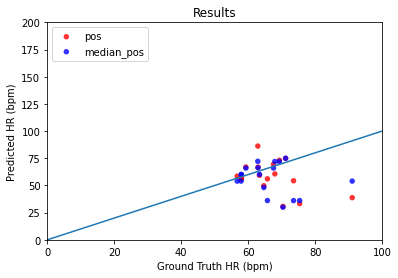

In [70]:
preds = (pos, median_pos)
colors = ("red", "blue")
groups = ("pos", "median_pos")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(xlim=(0, 100), ylim=(0, 200))
ax.plot((0,100), (0,100))
plt.xlabel('Ground Truth HR (bpm)')
plt.ylabel('Predicted HR (bpm)')

i=1
for color,group,pred in zip(colors,groups,preds):
    ax.scatter(gt, pred, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('Results')
plt.legend(loc=2)
plt.show()
plt.close()

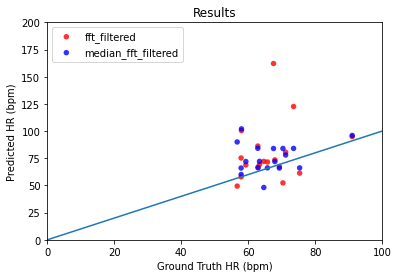

In [74]:
preds = (fft_filtered, median_fft_filtered)
colors = ("red", "blue")
groups = ("fft_filtered", "median_fft_filtered")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(xlim=(0, 100), ylim=(0, 200))
ax.plot((0,100), (0,100))
plt.xlabel('Ground Truth HR (bpm)')
plt.ylabel('Predicted HR (bpm)')

i=1
for color,group,pred in zip(colors,groups,preds):
    ax.scatter(gt, pred, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('Results')
plt.legend(loc=2)
plt.show()
plt.close()

In [84]:
samples = np.array(samples)[wechat_compression==False]
gt = np.array([float(rows[i][fields.adjusted_hr_bpm]) for i in samples])
pos = np.array([float(rows[i][fields.hr_pos]) for i in samples])
fft_filtered = np.array([float(rows[i][fields.hr_fft_filtered]) for i in samples])
median_pos = np.array([float(rows[i][fields.median_pos]) for i in samples])
median_fft_filtered = np.array([float(rows[i][fields.median_fft_filtered]) for i in samples])

wechat_compression = np.array([rows[i][fields.wechat_compression]=='Y' for i in samples])

rmse_pos = utils.calculate_rmse(gt, pos)
rmse_fft_filtered = utils.calculate_rmse(gt, fft_filtered)
rmse_median_pos = utils.calculate_rmse(gt, median_pos)
rmse_median_fft_filtered = utils.calculate_rmse(gt, median_fft_filtered)

print("rmse_pos: ", rmse_pos)
print("rmse_fft_filtered: ", rmse_fft_filtered)
print("rmse_median_pos: ", rmse_median_pos)
print("rmse_median_fft_filtered: ", rmse_median_fft_filtered)

rmse_pos:  14.17758577213106
rmse_fft_filtered:  15.256186506712933
rmse_median_pos:  14.437972304662098
rmse_median_fft_filtered:  17.429792039030367


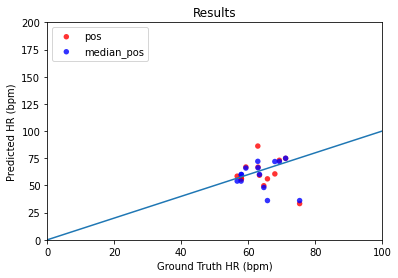

In [85]:
preds = (pos, median_pos)
colors = ("red", "blue")
groups = ("pos", "median_pos")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(xlim=(0, 100), ylim=(0, 200))
ax.plot((0,100), (0,100))
plt.xlabel('Ground Truth HR (bpm)')
plt.ylabel('Predicted HR (bpm)')

i=1
for color,group,pred in zip(colors,groups,preds):
    ax.scatter(gt, pred, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('Results')
plt.legend(loc=2)
plt.show()
plt.close()

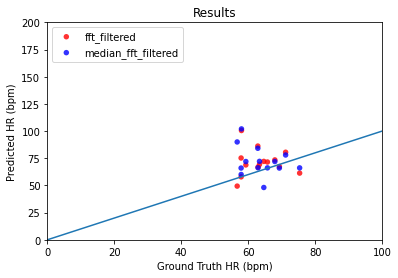

In [86]:
preds = (fft_filtered, median_fft_filtered)
colors = ("red", "blue")
groups = ("fft_filtered", "median_fft_filtered")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(xlim=(0, 100), ylim=(0, 200))
ax.plot((0,100), (0,100))
plt.xlabel('Ground Truth HR (bpm)')
plt.ylabel('Predicted HR (bpm)')

i=1
for color,group,pred in zip(colors,groups,preds):
    ax.scatter(gt, pred, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('Results')
plt.legend(loc=2)
plt.show()
plt.close()

In [8]:
test_group = [6, 8, 9, 10, 12, 13, 14, 16, 20, 22]
compressed_dir = "dataset/compressed/"

original_sizes = []
compressed_sizes = []

for filename in os.listdir(video_dir):
    index_str = filename[:filename.find('.')]
    index_int = int(index_str)
    
    if index_int not in test_group: continue
    original_sizes.append(os.stat(video_dir+filename).st_size)
    
for filename in os.listdir(compressed_dir):
    compressed_sizes.append(os.stat(compressed_dir+filename).st_size)

In [14]:
np.mean(original_sizes) / (2 ** 20)

31.7916898727417

In [15]:
np.mean(compressed_sizes) / (2 ** 20)

2.072788143157959